<a href="https://colab.research.google.com/github/dewirizki/UAS_DataMining/blob/main/%20UAS%20Data%20Mining%20Genap%202021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining dengan Tema Economic Growth (Pertumbuhan Ekonomi)



In [ ]:
#Mengimport module yang akan digunakan
import warnings; warnings.simplefilter('ignore'); warnings.filterwarnings('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import linalg
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

## Data Pekerja berdasarkan Pekerjaan

### Exploratory Data Analysis Dataset Employment by Occupation

In [ ]:
data_job = pd.read_csv('/content/Data/employment by occupation.csv')

In [ ]:
data_job

,Countries,Year(s),"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others,Source
0,Brunei Darussalam,2014.0,33.2,7.6,11.4,19.5,1.4,13.0,13.9,ASEAN Secretariat
1,Cambodia,2014.0,3.7,0.8,3.9,15.3,58.1,17.3,0.9,ASEAN Secretariat
2,Indonesia,1999.0,3.9,0.3,4.9,23.6,43.0,24.0,0.3,ASEAN Secretariat
3,Lao's PDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASEAN Secretariat
4,Malaysia,2014.0,20.3,4.9,9.1,23.0,7.2,22.8,12.7,ASEAN Secretariat
5,Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASEAN Secretariat
6,Philippines,2014.0,7.5,15.8,6.2,19.3,13.6,37.1,0.5,ASEAN Secretariat
7,Singapore,2014.0,36.8,16.3,12.6,12.2,NaN,10.9,11.3,ASEAN Secretariat
8,Thailand,2014.0,10.3,3.7,3.9,18.9,31.7,21.2,10.2,ASEAN Secretariat
9,Viet Nam,2014.0,9.2,1.1,1.7,16.1,12.2,19.3,40.3,ASEAN Secretariat


In [ ]:
data_job.columns

Index(['Countries', 'Year(s)', 'Professionals, technical and related workers',
       'Administrative, executive and managerial workers',
       'Clerical and related workers', 'Sales workers and services workers',
       'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
       'Production and related workers, transport equipment operators and labourers',
       'Others', 'Source'],
      dtype='object')

In [ ]:
data_job.drop('Source', axis=1, inplace=True)
data_job.drop('Year(s)', axis=1, inplace=True)

In [ ]:
data_job

,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
0,Brunei Darussalam,33.2,7.6,11.4,19.5,1.4,13.0,13.9
1,Cambodia,3.7,0.8,3.9,15.3,58.1,17.3,0.9
2,Indonesia,3.9,0.3,4.9,23.6,43.0,24.0,0.3
3,Lao's PDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Malaysia,20.3,4.9,9.1,23.0,7.2,22.8,12.7
5,Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Philippines,7.5,15.8,6.2,19.3,13.6,37.1,0.5
7,Singapore,36.8,16.3,12.6,12.2,NaN,10.9,11.3
8,Thailand,10.3,3.7,3.9,18.9,31.7,21.2,10.2
9,Viet Nam,9.2,1.1,1.7,16.1,12.2,19.3,40.3


In [ ]:
#Melihat tipe data dari masing masing-masing variabel
data_job.dtypes

Countries                                                                       object
Professionals, technical and related workers                                   float64
Administrative, executive and managerial workers                               float64
Clerical and related workers                                                   float64
Sales workers and services workers                                             float64
Agricultural, animal husbandry and forestry workers; fishermen and hunters     float64
Production and related workers, transport equipment operators and labourers    float64
Others                                                                         float64
dtype: object

In [ ]:
#Untuk mengetahui berapa banyak Missing Values di masing-masing variabel
print(data_job.isnull().sum())

Countries                                                                      0
Professionals, technical and related workers                                   2
Administrative, executive and managerial workers                               2
Clerical and related workers                                                   2
Sales workers and services workers                                             2
Agricultural, animal husbandry and forestry workers; fishermen and hunters     3
Production and related workers, transport equipment operators and labourers    2
Others                                                                         2
dtype: int64


### Mengimputasi missing value dengan median dan mean

In [ ]:
data_job['Professionals, technical and related workers'].fillna(data_job['Professionals, technical and related workers'].mean(),inplace=True)
data_job['Administrative, executive and managerial workers'].fillna(data_job['Administrative, executive and managerial workers'].mean(),inplace=True)
data_job['Clerical and related workers'].fillna(data_job['Clerical and related workers'].mean(),inplace=True)
data_job['Sales workers and services workers'].fillna(data_job['Sales workers and services workers'].mean(),inplace=True)
data_job['Agricultural, animal husbandry and forestry workers; fishermen and hunters '].fillna(data_job['Agricultural, animal husbandry and forestry workers; fishermen and hunters '].mean(),inplace=True)
data_job['Production and related workers, transport equipment operators and labourers'].fillna(data_job['Production and related workers, transport equipment operators and labourers'].mean(),inplace=True)
data_job['Others'].fillna(data_job['Others'].median(),inplace=True)

Mengimputasi missing value dapat dilakukan dengan berbagai cara, salah satunya dengan ***univariate imputation*** dengan menggunakan median, mean maupun modus. Data missing value yang diimputasi dengan menggunakan median maupun meann dikarenakan data numerik. Data yang berdistribusi skewed ke kiri maupun kanan diimputasi dengan menggunakan median, sedangkan sisanya diimputasi menggunakan mean.

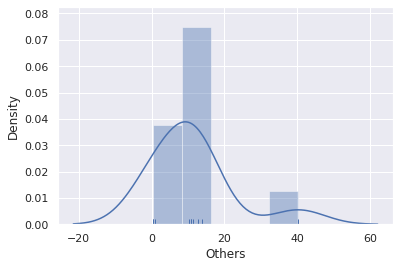

In [ ]:
p = sns.distplot(data_job['Others'], kde=True, rug=True)

In [ ]:
data_job

,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
0,Brunei Darussalam,33.2000,7.6000,11.4000,19.5000,1.400000,13.0,13.90
1,Cambodia,3.7000,0.8000,3.9000,15.3000,58.100000,17.3,0.90
2,Indonesia,3.9000,0.3000,4.9000,23.6000,43.000000,24.0,0.30
3,Lao's PDR,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
4,Malaysia,20.3000,4.9000,9.1000,23.0000,7.200000,22.8,12.70
5,Myanmar,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
6,Philippines,7.5000,15.8000,6.2000,19.3000,13.600000,37.1,0.50
7,Singapore,36.8000,16.3000,12.6000,12.2000,23.885714,10.9,11.30
8,Thailand,10.3000,3.7000,3.9000,18.9000,31.700000,21.2,10.20
9,Viet Nam,9.2000,1.1000,1.7000,16.1000,12.200000,19.3,40.30


In [ ]:
#Menambahkan Variabel Tahun
data_job['Tahun']='2014','2014','1999','2014','2014','2014','2014','2014','2014','2014'

In [ ]:
#Mengubah letak kolom 
cols = data_job.columns.tolist()

In [ ]:
cols = cols[-1:] + cols[:-1]

In [ ]:
cols

['Tahun',
 'Countries',
 'Professionals, technical and related workers',
 'Administrative, executive and managerial workers',
 'Clerical and related workers',
 'Sales workers and services workers',
 'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
 'Production and related workers, transport equipment operators and labourers',
 'Others']

In [ ]:
#Dimasukan kedalam variabel data_job
data_job = data_job[cols]

In [ ]:
data_job

,Tahun,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
0,2014,Brunei Darussalam,33.2000,7.6000,11.4000,19.5000,1.400000,13.0,13.90
1,2014,Cambodia,3.7000,0.8000,3.9000,15.3000,58.100000,17.3,0.90
2,1999,Indonesia,3.9000,0.3000,4.9000,23.6000,43.000000,24.0,0.30
3,2014,Lao's PDR,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
4,2014,Malaysia,20.3000,4.9000,9.1000,23.0000,7.200000,22.8,12.70
5,2014,Myanmar,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
6,2014,Philippines,7.5000,15.8000,6.2000,19.3000,13.600000,37.1,0.50
7,2014,Singapore,36.8000,16.3000,12.6000,12.2000,23.885714,10.9,11.30
8,2014,Thailand,10.3000,3.7000,3.9000,18.9000,31.700000,21.2,10.20
9,2014,Viet Nam,9.2000,1.1000,1.7000,16.1000,12.200000,19.3,40.30


In [ ]:
#Mengubah tipe data variabel Tahun
data_job['Tahun']=data_job['Tahun'].astype('datetime64')

In [ ]:
#Menjadikan variabel 'Tahun' menjadi index pada dataset ini
data_job= data_job.set_index(['Tahun'])

In [ ]:
data_job=data_job.sort_values(by='Tahun')

In [ ]:
data_job

,Countries,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
Tahun,,,,,,,,
1999-01-01,Indonesia,3.9000,0.3000,4.9000,23.6000,43.000000,24.0,0.30
2014-01-01,Brunei Darussalam,33.2000,7.6000,11.4000,19.5000,1.400000,13.0,13.90
2014-01-01,Cambodia,3.7000,0.8000,3.9000,15.3000,58.100000,17.3,0.90
2014-01-01,Lao's PDR,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
2014-01-01,Malaysia,20.3000,4.9000,9.1000,23.0000,7.200000,22.8,12.70
2014-01-01,Myanmar,15.6125,6.3125,6.7125,18.4875,23.885714,20.7,10.75
2014-01-01,Philippines,7.5000,15.8000,6.2000,19.3000,13.600000,37.1,0.50
2014-01-01,Singapore,36.8000,16.3000,12.6000,12.2000,23.885714,10.9,11.30
2014-01-01,Thailand,10.3000,3.7000,3.9000,18.9000,31.700000,21.2,10.20


In [ ]:
data_job.dtypes

Countries                                                                       object
Professionals, technical and related workers                                   float64
Administrative, executive and managerial workers                               float64
Clerical and related workers                                                   float64
Sales workers and services workers                                             float64
Agricultural, animal husbandry and forestry workers; fishermen and hunters     float64
Production and related workers, transport equipment operators and labourers    float64
Others                                                                         float64
dtype: object

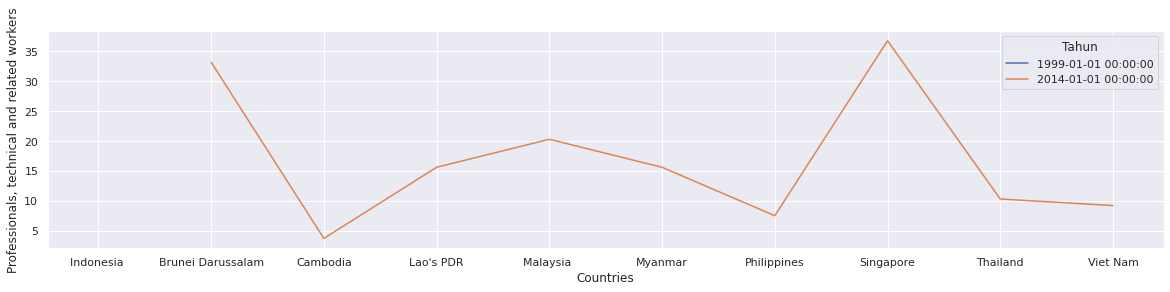

In [ ]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Professionals, technical and related workers", data=data_job, hue='Tahun')

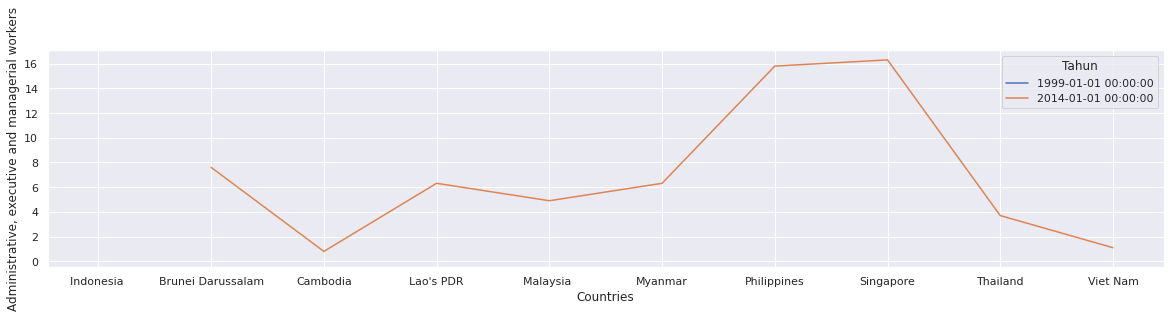

In [ ]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Administrative, executive and managerial workers", data=data_job, hue='Tahun')

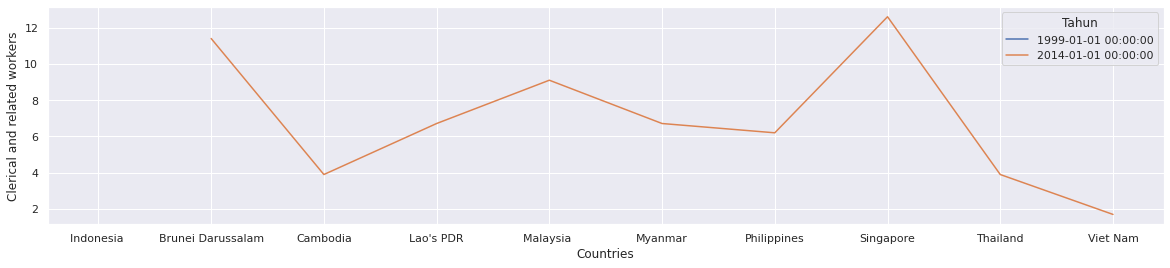

In [ ]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Clerical and related workers", data=data_job, hue='Tahun')

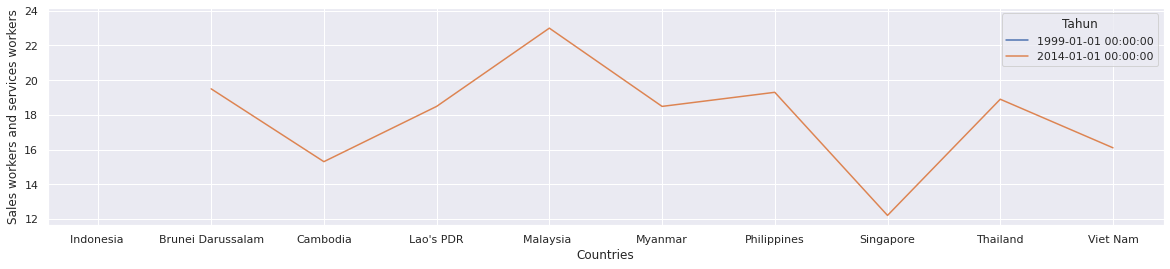

In [ ]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Sales workers and services workers", data=data_job, hue='Tahun')

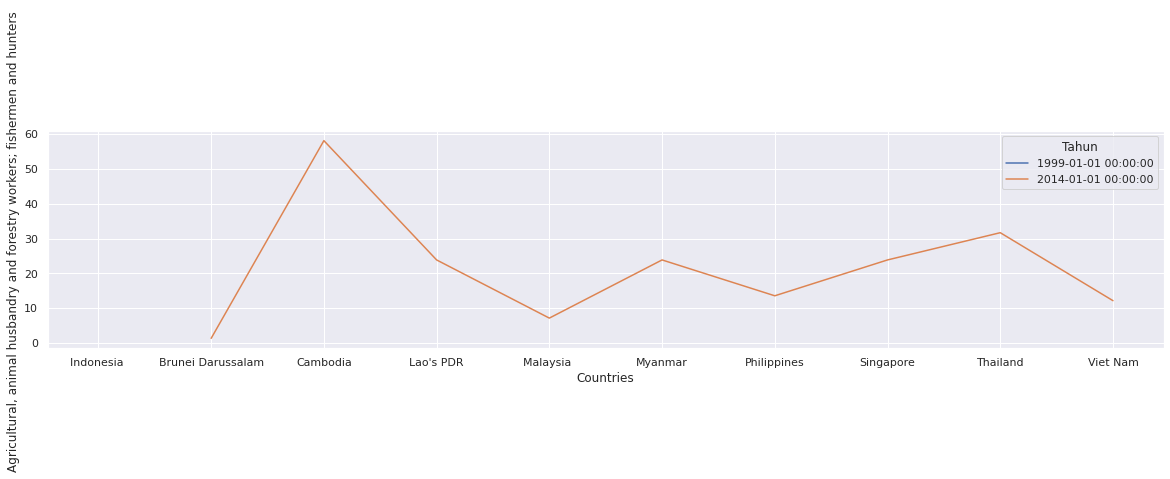

In [ ]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Agricultural, animal husbandry and forestry workers; fishermen and hunters ", data=data_job, hue='Tahun')

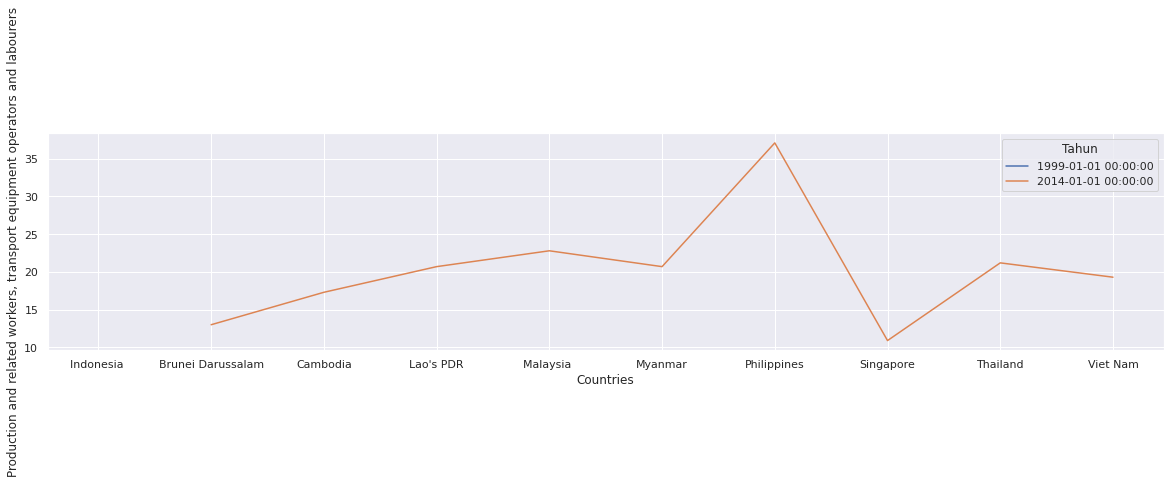

In [ ]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Production and related workers, transport equipment operators and labourers", data=data_job, hue='Tahun')

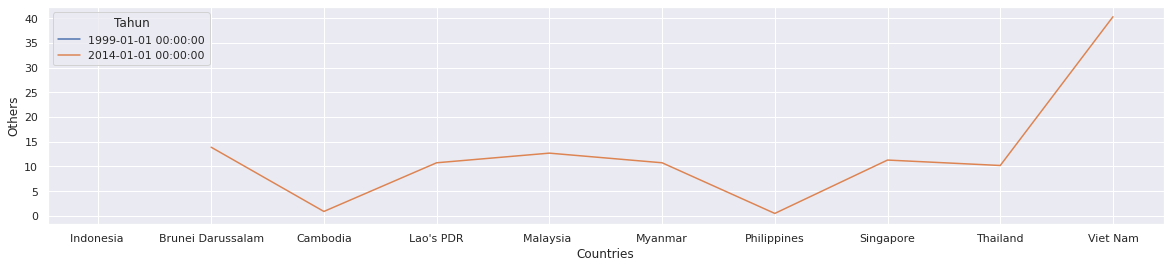

In [ ]:
plt.figure( figsize=(20,4))
plot = sns.lineplot(x="Countries", y="Others", data=data_job, hue='Tahun')

# Data Penganggurang Orang Dewasa (Adult Unemployment)

In [ ]:
#Mengimport data pengangguuran dewasa di ASEAN
data_adultune = pd.read_csv('/content/Data/adult unemployment.csv')

In [ ]:
data_adultune.head()

In [ ]:
data_adultune.columns

In [ ]:
data_adultune.drop('Source ', axis=1, inplace=True)

## Memisahkan antar data pengangguran laki-laki dan perempuan

### Data Pengangguran Laki-Laki

In [ ]:
data_adultune_male=data_adultune[['Countries','2004M','2005M','2006M','2007M','2008M','2009M','2010M','2011M','2012M','2013M','2014M']]

In [ ]:
data_adultune_male=data_adultune_male.rename(columns={'2004M':'2004','2005M':'2005','2006M':'2006','2007M':'2007','2008M':'2008','2009M':'2009',\
                                   '2010M':'2010','2011M':'2011','2012M':'2012','2013M':'2013','2014M':'2014'})

In [ ]:
#Untuk mengetahu tipe data pada dataset data_adultune_male
data_adultune_male.dtypes

In [ ]:
#Untuk mengetahui missing value
print(data_adultune_male.isnull().sum())

In [ ]:
#Mengimputasi missing value dengan menggunakan mean atau median
data_adultune_male['2004'].fillna(data_adultune_male['2004'].median(),inplace=True)
data_adultune_male['2005'].fillna(data_adultune_male['2005'].mean(),inplace=True)
data_adultune_male['2006'].fillna(data_adultune_male['2006'].mean(),inplace=True)
data_adultune_male['2006'].fillna(data_adultune_male['2006'].mean(),inplace=True)
data_adultune_male['2007'].fillna(data_adultune_male['2007'].median(),inplace=True)
data_adultune_male['2008'].fillna(data_adultune_male['2008'].median(),inplace=True)
data_adultune_male['2009'].fillna(data_adultune_male['2009'].mean(),inplace=True)
data_adultune_male['2011'].fillna(data_adultune_male['2011'].median(),inplace=True)
data_adultune_male['2012'].fillna(data_adultune_male['2012'].mean(),inplace=True)
data_adultune_male['2013'].fillna(data_adultune_male['2013'].median(),inplace=True)
data_adultune_male['2014'].fillna(data_adultune_male['2014'].median(),inplace=True)

Mengimputasi missing value dapat dilakukan dengan berbagai cara, salah satunya dengan ***univariate imputation*** dengan menggunakan median, mean maupun modus. Data missing value yang diimputasi dengan menggunakan median maupun meann dikarenakan data numerik. Data yang berdistribusi skewed ke kiri maupun kanan diimputasi dengan menggunakan median, sedangkan sisanya diimputasi menggunakan mean.

In [ ]:
print(data_adultune_male.isnull().sum())

In [ ]:
data_adultune_male

In [ ]:
data_adultune_male.rename(index=lambda x: data_adultune_male.at[x,'Countries'], inplace=True)
data_adultune_male= data_adultune_male.transpose()

In [ ]:
data_adultune_male = data_adultune_male.drop(['Countries'])
df1 = data_adultune_male.loc[(data_adultune_male != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

In [ ]:
df1

In [ ]:
p = df1.plot(subplots=True, figsize=(20,15))

In [ ]:
#Menambahkan Kolom jenis kelamin
df1['Jenis Kelamin']='Laki-laki'

In [ ]:
df1.head()

In [ ]:
data_male = df1

In [ ]:
data_male['Tahun'] = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']

In [ ]:
data_male['Brunei Darussalam']=data_male['Brunei Darussalam'].astype('float64')
data_male['Cambodia']=data_male['Cambodia'].astype('float64')
data_male['Indonesia ']=data_male['Indonesia '].astype('float64')
data_male["Lao's PDR"]=data_male["Lao's PDR"].astype('float64')
data_male["Malaysia "]=data_male["Malaysia "].astype('float64')
data_male["Myanmar"]=data_male["Myanmar"].astype('float64')
data_male["Philippines"]=data_male["Philippines"].astype('float64')
data_male["Singapore"]=data_male["Singapore"].astype('float64')
data_male["Thailand"]=data_male["Thailand"].astype('float64')
data_male["Viet Nam"]=data_male["Viet Nam"].astype('float64')
data_male["Jenis Kelamin"]=data_male["Jenis Kelamin"].astype('category')
data_male['Tahun']=data_male['Tahun'].astype('datetime64')

In [ ]:
col1 = data_male.columns.tolist()

In [ ]:
col1 = col1[-1:] + col1[:-1]

In [ ]:
data_male=data_male[col1]

In [ ]:
data_male= data_male.set_index(['Tahun'])

In [ ]:
data_male.head()

### Data Female Adult Unemployment

In [ ]:
data_adultune_female = data_adultune[['Countries','2004F','2005F','2006F','2007F','2008F','2009F','2010F','2011F','2012F','2013F','2014F']]

In [ ]:
data_adultune_female = data_adultune_female.rename(columns={'2004F':'2004','2005F':'2005','2006F':'2006','2007F':'2007','2008F':'2008','2009F':'2009',\
                                   '2010F':'2010','2011F':'2011','2012F':'2012','2013F':'2013','2014F':'2014'}) 

In [ ]:
data_adultune_female

In [ ]:
data_adultune_female.dtypes

In [ ]:
#Untuk Mengetahui mising value
print(data_adultune_female.isnull().sum())

In [ ]:
#Mengimputasi missing value dengan median atau mean
data_adultune_female['2004'].fillna(data_adultune_female['2004'].median(),inplace=True)
data_adultune_female['2005'].fillna(data_adultune_female['2005'].mean(),inplace=True)
data_adultune_female['2006'].fillna(data_adultune_female['2006'].mean(),inplace=True)
data_adultune_female['2007'].fillna(data_adultune_female['2007'].mean(),inplace=True)
data_adultune_female['2008'].fillna(data_adultune_female['2008'].mean(),inplace=True)
data_adultune_female['2009'].fillna(data_adultune_female['2009'].mean(),inplace=True)
data_adultune_female['2011'].fillna(data_adultune_female['2011'].mean(),inplace=True)
data_adultune_female['2012'].fillna(data_adultune_female['2012'].mean(),inplace=True)
data_adultune_female['2013'].fillna(data_adultune_female['2013'].mean(),inplace=True)
data_adultune_female['2014'].fillna(data_adultune_female['2014'].mean(),inplace=True)

Mengimputasi missing value dapat dilakukan dengan berbagai cara, salah satunya dengan ***univariate imputation*** dengan menggunakan median, mean maupun modus. Data missing value yang diimputasi dengan menggunakan median maupun meann dikarenakan data numerik. Data yang berdistribusi skewed ke kiri maupun kanan diimputasi dengan menggunakan median, sedangkan sisanya diimputasi menggunakan mean.

In [ ]:
p = sns.distplot(data_adultune_female['2014'], kde=True, rug=True)

In [ ]:
print(data_adultune_female.isnull().sum())

In [ ]:
data_adultune_female.rename(index=lambda x: data_adultune_female.at[x,'Countries'], inplace=True)
data_adultune_female= data_adultune_female.transpose()

In [ ]:
data_adultune_female = data_adultune_female.drop(['Countries'])
df2 = data_adultune_female.loc[(data_adultune_female != 0).any(1)]
df2.index = pd.to_datetime(df2.index)

In [ ]:
df2

In [ ]:
p = df2.plot(subplots=True, figsize=(20,15))

In [ ]:
#Menambahkan kolom jenis kelamin
df2['Jenis Kelamin']='Perempuan'

In [ ]:
df2.head()

In [ ]:
data_female = df2

In [ ]:
data_female['Tahun'] = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']

In [ ]:
data_female.dtypes

In [ ]:
data_female['Brunei Darussalam']=data_female['Brunei Darussalam'].astype('float64')
data_female['Cambodia']=data_female['Cambodia'].astype('float64')
data_female['Indonesia ']=data_female['Indonesia '].astype('float64')
data_female["Lao's PDR"]=data_female["Lao's PDR"].astype('float64')
data_female["Malaysia "]=data_female["Malaysia "].astype('float64')
data_female["Myanmar"]=data_female["Myanmar"].astype('float64')
data_female["Philippines"]=data_female["Philippines"].astype('float64')
data_female["Singapore"]=data_female["Singapore"].astype('float64')
data_female["Thailand"]=data_female["Thailand"].astype('float64')
data_female["Viet Nam"]=data_female["Viet Nam"].astype('float64')
data_female["Jenis Kelamin"]=data_female["Jenis Kelamin"].astype('category')
data_female['Tahun']=data_female['Tahun'].astype('datetime64')

In [ ]:
col2 = data_female.columns.tolist()

In [ ]:
col2 = col2[-1:] + col2[:-1]

In [ ]:
col2

In [ ]:
data_female = data_female[col2]

In [ ]:
data_female= data_female.set_index(['Tahun'])

In [ ]:
data_female.head()

## Menggabungkan dataFrame data_male dan data_female

In [ ]:
data = pd.concat([data_male,data_female])

In [ ]:
data

In [ ]:
data.sort_values(by='Tahun')

In [ ]:
data.dtypes

In [ ]:
data['Indonesia '].plot(figsize=(12,6))

# Modelling Menggunakan ARIMA

## Memprediksi tingkat pengangguran di Negara Indoenesia berdasarkan Gender (Laki-Laki) dan Perempuan

### 1. DataFrame data_male

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest=adfuller(dataset, autolag = 'AIC')
  print('1. ADF : ',dftest[0])
  print('2. P-Value : ',dftest[1])
  print('3. Num of lag : ',dftest[2])
  print('4. Num of Observation Used for ADF Regression and Critical Values Calculation : ',dftest[3])
  print('5. Critical Values : ')
  for key, val in dftest[4].items():
    print("\t", key, ":", val)

In [ ]:
data_male['Indonesia '].plot(figsize=(12,6))

In [ ]:
ad_test(data_male['Indonesia '])

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(data_male['Indonesia '], trace = True, suppress_warnings=True)
stepwise_fit.summary()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 

In [ ]:
print(data_male.shape)
train = data_male.iloc[:8]
test = data_male.iloc[8:]
print(train.shape, test.shape)

In [ ]:
train

In [ ]:
train.info()

In [ ]:
model = ARIMA(train['Indonesia '],order=(0,1,0))
model = model.fit()
model.summary()

In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
pred.index=data_male.index[start:end+1]
print(pred)

In [ ]:
pred.plot(legend=True)
test['Indonesia '].plot(legend=True)

In [ ]:
test['Indonesia '].mean()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Indonesia ']))
print(rmse)

In [ ]:
model2 = ARIMA(data_male['Indonesia '],order=(0,1,0))
model2=model2.fit()
data_male.tail()

In [ ]:
pred=model2.predict(start=len(data_male), end=len(data_male)+30, typ='levels').rename('ARIMA Prediction')

In [ ]:
pred

In [ ]:
pred.plot(figsize=(12,5),legend=True)

### 2. DataFrame data_female

In [ ]:
data_female['Indonesia '].plot(figsize=(12,6))

In [ ]:
ad_test(data_female['Indonesia '])

In [ ]:
stepwise_fit = auto_arima(data_female['Indonesia '], trace = True, suppress_warnings=True)
stepwise_fit.summary()

In [ ]:
print(data_female.shape)
train1 = data_female.iloc[:8]
test1 = data_female.iloc[8:]
print(train.shape, test.shape)

In [ ]:
train

In [ ]:
model3 = ARIMA(train['Indonesia '],order=(0,1,0))
model3 = model3.fit()
model3.summary()

In [ ]:
start = len(train1)
end = len(train1)+len(test1)-1
pred1 = model3.predict(start=start, end=end, typ='levels')
pred1.index=data_female.index[start:end+1]
print(pred1)

In [ ]:
pred1.plot(legend=True)
test1['Indonesia '].plot(legend=True)

In [ ]:
test1['Indonesia '].mean()

In [ ]:
rmse = sqrt(mean_squared_error(pred1, test1['Indonesia ']))
print(rmse)

In [ ]:
model4 = ARIMA(data_female['Indonesia '],order=(0,1,0))
model4=model4.fit()
data_female.tail()

In [ ]:
pred1=model4.predict(start=len(data_female), end=len(data_female)+30, typ='levels').rename('ARIMA Prediction')

In [ ]:
pred1

In [ ]:
pred1.plot(figsize=(12,6),legend=True)